# Module 1 (E5) - Data Science Tooling Stack

This notebook serves three purposes:
* **Confirm your environment** is working (Python, packages, kernel, filesystem).
* **Teach the mental model** of the core tooling stack that will be used in future labs
* **Provide hands-on reps** with the basics: NumPy, Pandas, scikit-learn, and matplotlib

**How to use this lab**
* Read the text (Markdown cells) like a guided walkthrough
* Run the code cells top-to-bottom
* Complete the tasks

### Learning Goals
* Explain the difference between Python, Jupyter, packages, and kernels
* Verify the environment and diagnose common issues
* Use NumPy arrays for numeric work and Pandas DataFrames for tabular data
* Fit a first scikit-learn model using a Pipeline
* Make a simple plot in matplotlib and interpret it as evidence

## 0. Warm-up: Verify JupyterLab

In [1]:
import sys, platform, os, pathlib, textwrap, json, math

In [2]:
print("Python:", sys.version.split()[0])
print("Executable:", sys.executable)
print("Platform:", platform.platform())
print("working directory:", os.getcwd())
print("Home directory", str(pathlib.Path.home()))

Python: 3.12.12
Executable: /home/glake/miniconda3/envs/ml/bin/python
Platform: Linux-6.14.0-37-generic-x86_64-with-glibc2.39
working directory: /home/glake/Nextcloud/Classwork/CS6678 - Advanced Machine Learning/Jupyter Notebooks
Home directory /home/glake


## 1. Environment check (packages + versions)

In [3]:
import importlib, pkgutil

packages = [
    "numpy",
    "pandas",
    "matplotlib",
    "sklearn",
]

missing = []
versions = {}

for p in packages:
    try:
        mod = importlib.import_module(p)
        versions[p] = getattr(mod, "__version__", "unknown")
    except Exception as e:
        missing.append((p, repr(e)))

print("Versions found:")
for k, v in versions.items():
    print(f"  - {k}: {v}")

if missing:
    print("/nMissing / failing imports:")
    for p, e in missing:
        print(f"  - {p}: {e}")
    raise RuntimeError("One or more packages are missing or failed to import")
    

Versions found:
  - numpy: 2.4.1
  - pandas: 2.3.3
  - matplotlib: 3.10.8
  - sklearn: 1.8.0


### Questions

1. What does `sys.executable` tell you?
    <span style="color:blue">`sys.executable` returns the location of the Python executable file</span>

3. What is the difference between
    * a **package**
    * a **kernel**
    * an **environment**

    <span style="color:blue">A package is an existing program that can be used in the project without having to create it from scratch.  A kernel is the computational engine that runs the code. An environment is a self-contained, isolated workspace. It allows you to load the packages necessary for the specific project without having to store them globally.</span>

## 2. Filesystem Basics

Here we will explore a few useful path operations

In [5]:
from pathlib import Path

home = Path.home()
print("Home:", home)

# List top-level items in your home directory
items = sorted(home.iterdir(), key=lambda p: p.name.lower())
for p in items[:30]:
    kind = "dir " if p.is_dir() else "file"
    print(f"{kind:4}  {p.name}")
print("/n(Showing up to 30 items)")

Home: /home/glake
file  .bash_history
file  .bash_logout
file  .bashrc
dir   .cache
dir   .conda
dir   .config
dir   .dotnet
dir   .dotnet6
file  .gitconfig
dir   .gnome
dir   .gnupg
dir   .ipython
dir   .java
dir   .jupyter
dir   .local
dir   .nuget
dir   .nv
dir   .pki
dir   .platformio
file  .profile
dir   .qiskit
dir   .ServiceHub
dir   .ssh
file  .sudo_as_admin_successful
dir   .templateengine
dir   .var
dir   .vmware
dir   .vscode
file  .wget-hsts
dir   Desktop
/n(Showing up to 30 items)


## 3. Tiny dataset to use throughout the lab

We will create a small synthetic dataset:
* `x1`, `x2` are numeric features
* `y` is a binary label (0/1)

In [6]:
import numpy as np
import pandas as pd

rng = np.random.default_rng(42)
n = 400

x1 = rng.normal(loc=0.0, scale=1.0, size=n)
x2 = rng.normal(loc=0.0, scale=1.0, size=n)

# Simple non-linear boundary + noise
logits = 1.2 * x1 - 0.8 * x2 + 0.3 * x1 * x2 + rng.normal(0, 0.6, size=n)
p = 1 / (1 + np.exp(-logits))
y = (p > 0.5).astype(int)

df = pd.DataFrame({"x1": x1, "x2": x2, "y": y})
df.head()

,x1,x2,y
0,0.304717,-0.179611,0
1,-1.039984,0.196776,0
2,0.750451,0.820528,1
3,0.940565,-0.393741,1
4,-1.951035,0.521167,0


In [7]:
df.describe(include="all")

,x1,x2,y
count,400.000000,400.000000,400.000000
mean,-0.005187,-0.052429,0.527500
std,0.952345,1.015929,0.499868
min,-2.566658,-2.964529,0.000000
25%,-0.666917,-0.783454,0.000000
50%,0.017173,-0.038530,1.000000
75%,0.595370,0.627657,1.000000
max,2.913862,2.597674,1.000000


## 4. NumPy vs Pandas: When to use which

#### NumPy
* Best for **numeric arrays** and math
* Fast vectorized operations (avoid Python loops)

#### Pandas
* Best for **tabular data** with column names, mixed types
* Filtering, grouping, joining, time series data

**In practice:**  
* Pandas for data work
* NumPy for numeric inner loops / linear algebra

### NumPy Basics

In [8]:
arr = np.array([1,2,3,4,5])
print("arr", arr)
print("type", type(arr))
print("mean", arr.mean())
print("arr * 10", arr * 10)

arr [1 2 3 4 5]
type <class 'numpy.ndarray'>
mean 3.0
arr * 10 [10 20 30 40 50]


### Pandas Basics

In [9]:
# selecting columns
X = df[["x1", "x2"]]
y = df["y"]

print("X shape:", X.shape)
print("y shape:", y.shape)

# filtering rows
df_pos = df[df["y"] == 1]
df_neg = df[df["y"] == 0]
print("positive:", len(df_pos), "negative:", len(df_neg))

X shape: (400, 2)
y shape: (400,)
positive: 211 negative: 189


### Practice

1. Create a new column `x1_sq = x1**x2`
2. Create a new column `signal = x1 - x2`
3. Show the first 5 rows of the updated DataFrame.

In [13]:
# add columns to the dataframe
df["x1_sq"] = df["x1"]**2
df["signal"] = df["x1"] - df["x2"]
df.head()


,x1,x2,y,x1_sq,signal
0,0.304717,-0.179611,0,0.092852,0.484328
1,-1.039984,0.196776,0,1.081567,-1.236760
2,0.750451,0.820528,1,0.563177,-0.070077
3,0.940565,-0.393741,1,0.884662,1.334306
4,-1.951035,0.521167,0,3.806538,-2.472202


In [14]:
# add columns using the assign function
df = df.assign(
    x2_sq = lambda x: x['x2']**2
)
df.head()

,x1,x2,y,x1_sq,signal,x2_sq
0,0.304717,-0.179611,0,0.092852,0.484328,0.032260
1,-1.039984,0.196776,0,1.081567,-1.236760,0.038721
2,0.750451,0.820528,1,0.563177,-0.070077,0.673267
3,0.940565,-0.393741,1,0.884662,1.334306,0.155032
4,-1.951035,0.521167,0,3.806538,-2.472202,0.271615


## 5. Plotting as Thinking (matplotlib)

Plotting as a thinking tool:
* Does the data look plausible?
* Are there outliers?
* Is the relationship linear-ish?

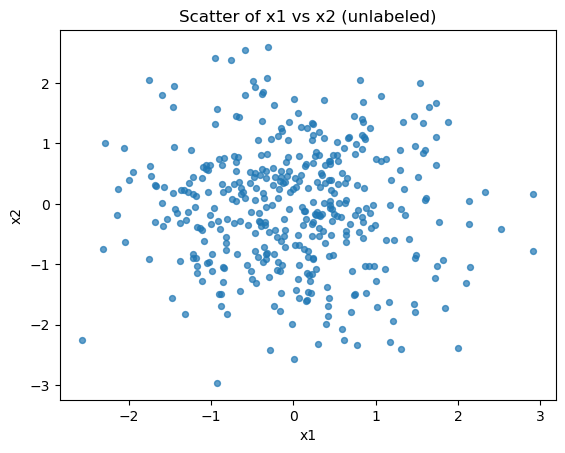

In [15]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df["x1"], df["x2"], s=18, alpha=0.7)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter of x1 vs x2 (unlabeled)")
plt.show()

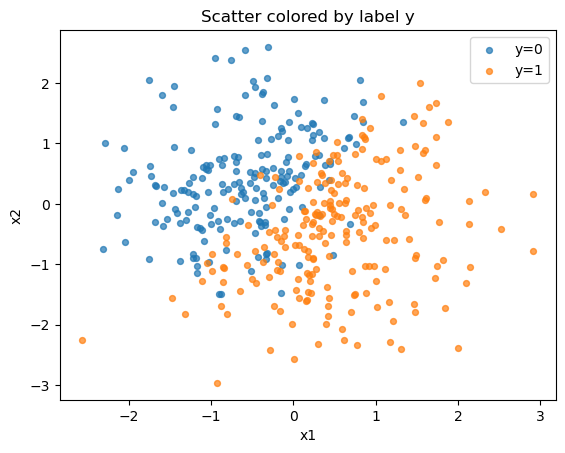

In [16]:
plt.figure()
for label, g in df.groupby("y"):
    plt.scatter(g["x1"], g["x2"], s=18, alpha=0.7, label=f"y={label}")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter colored by label y")
plt.legend()
plt.show()

### Practice

Make a histogram of `x1` and `x2` on separate plots.  

Hint: `plt.hist(...)` and `plt.figure()`

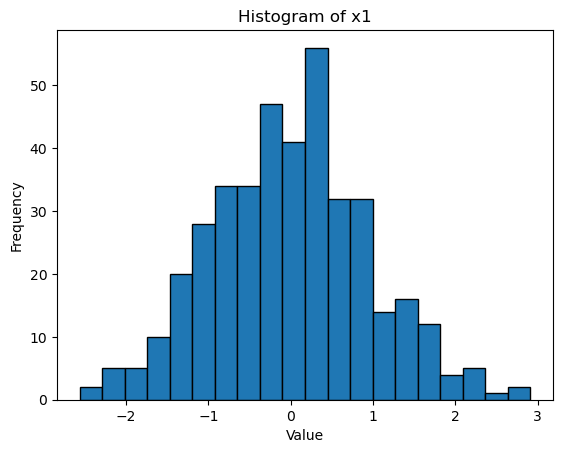

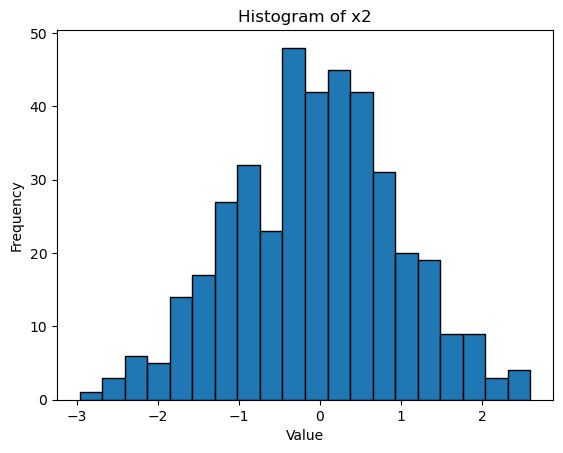

In [19]:
plt.figure()
plt.hist(df["x1"], bins=20, edgecolor="black")
plt.title("Histogram of x1")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.hist(df["x2"], bins=20, edgecolor="black")
plt.title("Histogram of x2")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

## 6. First Model in Scikit-Learn

Scikit-Learn standardizes the ML workflow:
* split data
* build a pipeline
* fit model
* evaluate

#### The big idea: Pipelines prevent mistakes
If preprocessing happens outside the pipeline, you can accidentally leak information. 

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[["x1", "x2"]]
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.70, random_state=42, stratify=y
)

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", LogisticRegression(max_iter=2000))
])

pipe.fit(X_train, y_train)

pred = pipe.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, pred))
print("\nReport:\n", classification_report(y_test, pred))

Accuracy: 0.8714285714285714

Confusion matrix:
 [[109  23]
 [ 13 135]]

Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       132
           1       0.85      0.91      0.88       148

    accuracy                           0.87       280
   macro avg       0.87      0.87      0.87       280
weighted avg       0.87      0.87      0.87       280



### Inspecting model outputs

for linear models, coefficients are interpretable:
* Sign tells direction of effect
* Magnitude tells strength (in standardized feature space if scaled)

Now, inspect the coefficients

In [25]:
coef = pipe.named_steps["model"].coef_[0]
for name, c in zip(X.columns, coef):
    print(f"{name:>3}: {c:+.3f}")

 x1: +2.610
 x2: -2.079


### Practice

1. Change the split seed (`random_state`) and rerun.
2. Does accuracy change? Why?
3. Try `test_size=0.40`. What happens?

#### Explanation
* The accuracy does change when I change the `random_state` value. It changes because when I change the seed, the algorithm shuffles and splits the data differently. However, it is coincidence that `random_state=42` produces and output than `random_state=99`
* Changing the `test_size` modifies how much of the data is used for the training set. A higher number increases the training set.

## 7. A slightly more realistic twist: Add a categorical feature

Real datasets have:
* missing values
* categorical data
* mixed scales

We will simulate that by creating a categorical column `segment` based on `x1`.

Then we will use a `ColumnTransformer` to do the right preprocessing:
* scale numeric columns
* one-hot encode categorical columns

This is the scikit-learn way

In [35]:
df2 = df.copy()
df2["segment"] = pd.cut(df2["x1"], bins=[-np.inf, -0.75, 0.75, np.inf], labels=["low", "mid", "high"])
df2.head()

,x1,x2,y,x1_sq,signal,x2_sq,segment
0,0.304717,-0.179611,0,0.092852,0.484328,0.032260,mid
1,-1.039984,0.196776,0,1.081567,-1.236760,0.038721,low
2,0.750451,0.820528,1,0.563177,-0.070077,0.673267,high
3,0.940565,-0.393741,1,0.884662,1.334306,0.155032,high
4,-1.951035,0.521167,0,3.806538,-2.472202,0.271615,low


In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

X = df2[["x1", "x2", "segment"]]
y = df2["y"]

num_cols = ["x1", "x2"]
cat_cols = ["segment"]

preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("impute", SimpleImputer(strategy="median")),
            ("scale", StandardScaler()),
        ]), num_cols),
        ("cat", Pipeline([
            ("impute", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore")),
        ]), cat_cols)
    ]
)

pipe2 = Pipeline([
    ("prep", preprocess), 
    ("model", LogisticRegression(max_iter=2000))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

pipe2.fit(X_train, y_train)
pred2 = pipe2.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred2))
print("\nConfusion matrix:\n", confusion_matrix(y_test, pred2))

Accuracy: 0.88

Confusion matrix:
 [[41  6]
 [ 6 47]]


## 8. Save artifacts (a habit for reproducibility)

In real work you save:
* cleaned datasets
* plots
* metrics
* model artifacts

Here, we will save
* The dataset as a CSV
* a plot image

In [40]:
from pathlib import Path
out_dir = Path.cwd() / "work" / "m1e5"
out_dir.mkdir(parents=True, exist_ok=True)
out_dir

PosixPath('/home/glake/Nextcloud/Classwork/CS6678 - Advanced Machine Learning/Jupyter Notebooks/work/m1e5')

In [41]:
csv_path = out_dir / "synthetic_data.csv"
df2.to_csv(csv_path, index=False)
print("Wrote:", csv_path)

Wrote: /home/glake/Nextcloud/Classwork/CS6678 - Advanced Machine Learning/Jupyter Notebooks/work/m1e5/synthetic_data.csv


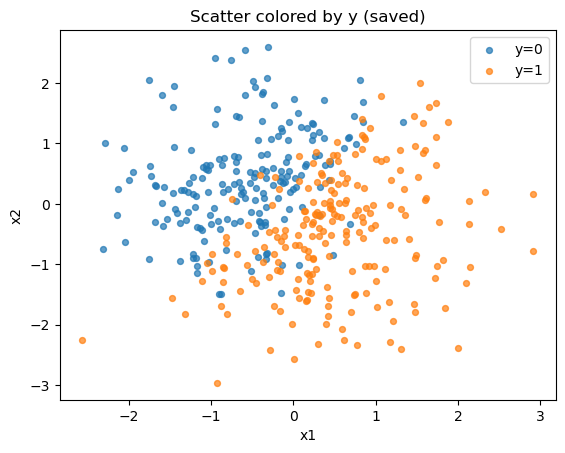

Wrote: /home/glake/Nextcloud/Classwork/CS6678 - Advanced Machine Learning/Jupyter Notebooks/work/m1e5/scatter.png


In [42]:
# Save a plot
plt.figure()
for label, g in df2.groupby("y"):
    plt.scatter(g["x1"], g["x2"], s=18, alpha=0.7, label=f"y={label}")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatter colored by y (saved)")
plt.legend()
img_path = out_dir / "scatter.png"
plt.savefig(img_path, dpi=160, bbox_inches="tight")
plt.show()
print("Wrote:", img_path)

## 9. Common troubleshooting checklist

If something breaks, this is the high-signal checklist:

### A) Imports fail
* The package may not be installed in the environment used by this notebook's kernel
* Confirm `sys.executable` and run `pip` or `conda install` from the same environment

### B) Kernel will not run cells
* Restart the kernel
* Refresh the browser tab

### C) File not found
* Confirm the path exists in the file browser
* Remember: paths are relative to the notebook's working directory



## 10. Reflection

Answer the following:
1. What does a scikit-learn Pipeline protect from?  
    <span style="color:blue">The pipeline's main area of protection is preventing data leakage. Data leakage is when the model learns from the test set and not the training set. A pipeline also helps to add structure to the project. </span>

2. When should you use NumPy vs Pandas?  
    <span style="color:blue">NumPy is used for math and numerical arrays. Pandas is used for tabular data, like tables</span>

4. What is one environment check that should be done every time a new project is started?  
    <span style="color:blue">You should verify that the environment is isolated. This keeps you from installing packages in a global environment, potentially breaking other projects.</span>